# Written text as operational data

Written text is one type of data

### Why people write?

 - To communicate: their thoughts, feelings, urgency, needs, information

### Why people communicate?

1. To express emotions
1. To share information
1. To enable or elicit an action
1. ...

### We will use written text for the purpose other than 
1. To experience emotion
1. To learn something the author intended us to learn
1. To do what the author intended us to do

### Instead, we will use written text to recognize who wrote it
 - By calculating and comparing word frequencies in written documents
 
See, for example, likely fictional story https://medium.com/@amuse/how-the-nsa-caught-satoshi-nakamoto-868affcef595

# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

# **Mini Project 1 done by Farhin Farhad Riya**

In [2]:
import nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## MiniProject1: task 1


In [6]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

stop_words = nltk.corpus.stopwords.words('english') + ['ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'', '\"', '-', '}', '{', '&', '|', u'\u2014' ]

def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

def cleanWord (w):
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    return re.sub('^[0-9\.]*$', "", wn)
       
def get_wf (URL):
    r = requests .get(URL)

    t = cleanHtml (r .text) .lower()
    
    wds = re .split('\s+',t)
    
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    wf = Counter (wds)
    
    for k in stop_words:
        wf. pop(k, None)
        
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    return (wfs [ 0:ml ] [::-1], tw)
        
# Now populate two lists    
(wf_ee, tw_ee) = get_wf('https://www.gutenberg.org/cache/epub/6130/pg6130.txt')
(wf_bu, tw_bu) = get_wf('https://www.gutenberg.org/cache/epub/1727/pg1727.txt')


# word frequence of "The IIiad" by Homer

In [11]:
ml = min(len(wf_ee),15)
for i in range(1,ml,1):
    print (wf_ee[i][0]+"\t\t"+str(wf_ee[i][1]))  

jove		306
war		310
yet		311
		311
achilles		313
thou		336
one		342
hector		347
o’er		363
arms		426
great		462
shall		504
thus		606
thy		931


# word frequence of "The Odyssey" by Homer

In [12]:
ml = min(len(wf_bu),15)
for i in range(1,ml,1):
    print (wf_bu[i][0]+"\t\t"+str(wf_bu[i][1]))  

tell		261
may		264
go		265
upon		270
come		280
went		300
us		300
man		310
men		311
would		380
house		382
said		482
one		549
ulysses		581


In [22]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)+1) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center', color="green")

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)+1) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center',color="green")


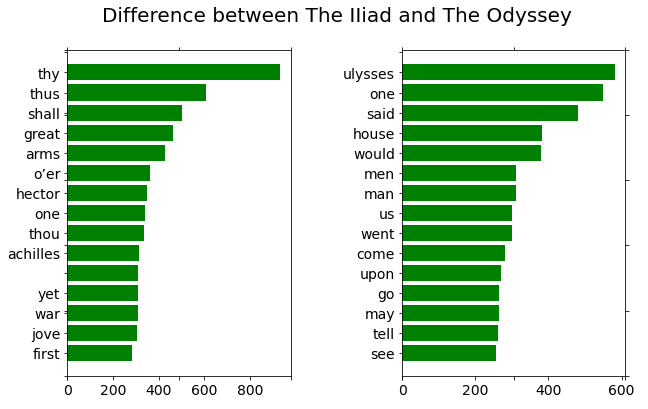

In [23]:
plotTwoLists (wf_ee, wf_bu,'Difference between The IIiad and The Odyssey')

##  MiniProject1: task 2

## Word frequency of Alice’s Adventures in Wonderland" by Lewis Carroll

In [24]:
(wf_ff, tw_ff) = get_wf('https://www.gutenberg.org/files/11/11-0.txt')
ml = min(len(wf_ff),15)
for i in range(1,ml,1):
    print (wf_ff[i][0]+"\t\t"+str(wf_ff[i][1]))  

queen		64
see		65
would		72
thought		73
could		75
like		78
went		83
one		88
project		88
		92
âi		119
little		124
alice		374
said		455


In [44]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 2)

def plotThreeLists (wf_ee, wf_bu, wf_ff, title):
    f = plt.figure (figsize=(12, 8))
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (211)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)+1) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center', color="green")
    ax1.title.set_text('Alice’s Adventures in Wonderland" by Lewis Carroll')

    ax2 = f .add_subplot (223)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)+1) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center',color="green")
    ax2.title.set_text('"The IIiad" by Homer')

    ax3 = f .add_subplot (224)
    ax3 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_ff)+1) 
    pylab .yticks (pos, [ x [0] for x in wf_ff ])
    ax3 .barh (range (len(wf_ff)), [ x [1] for x in wf_ff ], align='center',color="green")
    ax3.title.set_text('"The Odyssey" by Homer')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0, flags=flags)


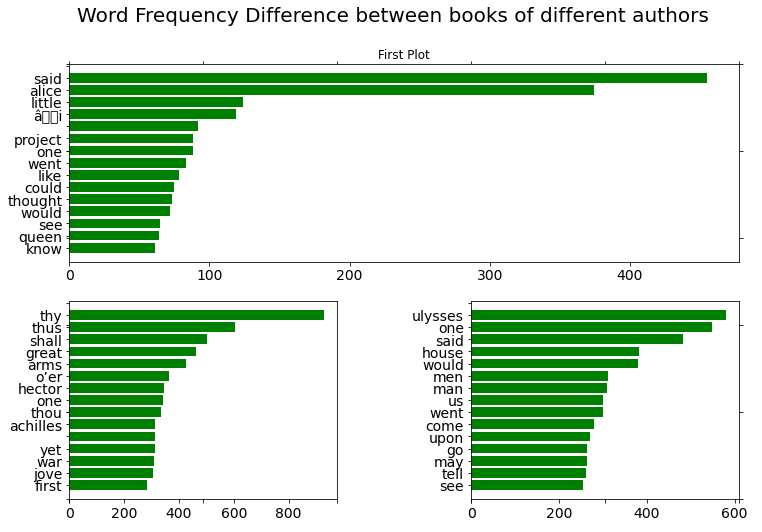

In [46]:
plotThreeLists (wf_ff, wf_ee, wf_bu, 'Word Frequency Difference between books of different authors')